# A Massa

Para calcular isso usarei como referência de PtGNB na qual usarei regra de 3 para achar primeiro a massa de material na solução, supondo que esta é homogênea e depois a massa de metais na solução, sendo único metal o titânio.

Aqui utilizamos $600 \mu L$ de Alcool isopropilíco, $400 \mu L$ de água destilada, $5 mg$ do Mxene e teremos $2 mL$ da solução colocada no eletrodo.

In [1]:
x = (4*2)/(600+400) #massa total do MXene por gota em mg.
#porcentage = Ti/Ti3C2
porcentage=0.3
#agora sabemos porcentagem, com ela achamos massa condutora
Mass = x*porcentage
print(f'{Mass} mg')
#passando para kg
MassG = Mass*10**(-3)#NA REAL É GRAMA

0.0024 mg


# A Capacitância
Aqui será analisadas as voltametrias ciclícas do MXene de $Ti_3AlC_2$ por meio de NaF+LiF (numerado como 1) e NaF+KF (numerado como 2). Por meio dela espero obter a capacitância do material, para fazer isso é necessário entender que a capacitância específica de um material é dada por

$\begin{equation}
    C_p = \frac{Q}{m V},
\end{equation}$

Sendo $m$ a massa de material e $V$ o potência dado. Como $Q = It$

$\begin{equation}
    C_p = \frac{I}{m (V/t)},
\end{equation}$

e $V/t$ é o scan rate, que pode ser escrito como $k$. Então

$\begin{equation}
    \boxed{\frac{I}{m} =C_p k}. 
\end{equation}$

Sendo $I/m$ a área entre as curvas dividia pela massa do material que foi calculada no começo

In [2]:
#importando dados
import pandas as pd
#primeiro vamos importar do LiF+NaF
data = pd.read_csv(f'M xenes 1 10mv -0,1_0,85.txt',sep=';')
V1 = data['Potential applied (V)'].values
A1 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 20mv -0,1_0,85.txt',sep=';')
V2 = data['Potential applied (V)'].values
A2 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 30mv -0,1_0,85.txt',sep=';')
V3 = data['Potential applied (V)'].values
A3 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 40mv -0,1_0,85.txt',sep=';')
V4 = data['Potential applied (V)'].values
A4 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 50mv -0,1_0,85.txt',sep=';')
V5 = data['Potential applied (V)'].values
A5 = data['WE(1).Current (A)'].values

#pegando intervalo ótimo e já colocando dividido pela massa
ii = int(len(V1)/5)
V11 = []
A11=[]
V22 = []
A22=[]
V33 = []
A33=[]
V44 = []
A44=[]
V55 = []
A55=[]
for i in range(1,6):
    V11.append(V1[ii*i:ii*(i+1)-30])
    A11.append(A1[ii*i:ii*(i+1)-30])
    
    V22.append(V2[ii*i:ii*(i+1)-30])
    A22.append(A2[ii*i:ii*(i+1)-30])
    
    V33.append(V3[ii*i:ii*(i+1)-30])
    A33.append(A3[ii*i:ii*(i+1)-30])
    
    V44.append(V4[ii*i:ii*(i+1)-30])
    A44.append(A4[ii*i:ii*(i+1)-30])
    
    V55.append(V5[ii*i:ii*(i+1)-30])
    A55.append(A5[ii*i:ii*(i+1)-30])
A12,A23,A32,A42,A52=[],[],[],[],[]
for i in range(len(V55)):
    A12.append(A11[i]-min(A11[i]))
    A23.append(A22[i] - min(A22[i]))
    A32.append(A33[i]-min(A33[i]))
    A42.append(A44[i]-min(A44[i]))
    A52.append(A55[i]-min(A55[i]))

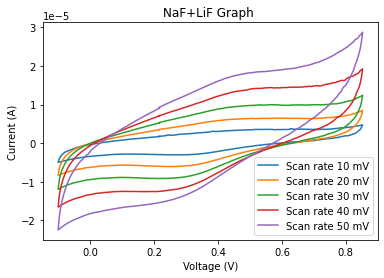

In [3]:
from matplotlib import pyplot as plt
u=3
plt.plot(V11[u],A11[u],'-',label='Scan rate 10 mV')
plt.plot(V22[u],A22[u],'-',label='Scan rate 20 mV')
plt.plot(V33[u],A33[u],'-',label='Scan rate 30 mV')
plt.plot(V44[u],A44[u],'-',label='Scan rate 40 mV')
plt.plot(V55[u],A55[u],'-',label='Scan rate 50 mV')

plt.legend()
plt.title('NaF+LiF Graph ')
plt.ylabel('Current (A)')
plt.xlabel('Voltage (V)')
plt.show()

In [4]:
import numpy as np
def area_between_points(x,y):
    area = 0
    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        avg_y = abs((y[i+1] + y[i]))/2
        area += abs(dx) * avg_y
    return abs(area)

def findlocal(x,x0,u):#acha onde está x0 na lista x se ele ja foi visto no indice u
    for i in range(len(x)):
        if x[i]==x0 and i!=u:
            return i
    return u
def fin(x,x0):
    for i in range(len(x)):
        if x[i]==x0:
            return True
    return False
def newarea(x,y):
    area=0
    gone=[]
    #calcular área como retângulo que vai de um ponto até outro
    for i in range(len(x)-1):
        dx = x[i+1]-x[i]
        y1=y[findlocal(x,x[i+1],i+1)]
        y2 = y[findlocal(x,x[i],i)]
        avg_y1 = (y1-y[i+1])
        avg_y2 = (y2-y[i])
        avg_y = (abs(avg_y1)+abs(avg_y2))/2
        if fin(gone,x[i])==False:
            area+=abs(dx*avg_y)
            gone.append(x[i])
    return area

Ae1,Ae2,Ae3,Ae4,Ae5=[],[],[],[],[]
for i in range(1,len(V11)-1):
    Ae1.append(newarea(V11[i], A12[i]))
    Ae2.append(newarea(V22[i], A23[i]))
    Ae3.append(newarea(V33[i], A32[i]))
    Ae4.append(newarea(V44[i], A42[i]))
    Ae5.append(newarea(V55[i], A52[i]))
Ae = [np.mean(Ae1),np.mean(Ae2),np.mean(Ae3),np.mean(Ae4),np.mean(Ae5)]
eAe = np.array([np.std(Ae1),np.std(Ae2),np.std(Ae3),np.std(Ae4),np.std(Ae5)])/np.sqrt(len(Ae1))
print(Ae)
print(eAe)

[3.6288896103700004e-06, 7.023622269431751e-06, 1.0635352308551477e-05, 1.4273795957366629e-05, 1.8141286298632626e-05]
[3.62648345e-08 4.69015123e-08 5.88091409e-08 3.91984576e-08
 2.21105301e-07]


Fit Parameter: C_p = 151.0+-2.0 F/g
0 = -0.0+-0.0


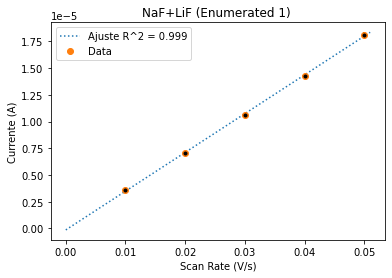

In [5]:
from scipy.optimize import curve_fit
k = np.array([10,20,30,40,50])
k = k*10**(-3)
def f(x,A,B):
    return A*x+B


popt, pcov = curve_fit(f,k,Ae)
std = np.sqrt(np.diag(pcov))
print(f'Fit Parameter: C_p = {round(popt[0]/MassG,0)}+-{round(std[0]/MassG,0)} F/g')
print(f'0 = {round(popt[1],6)}+-{round(std[1],6)}')
ydata_mean = np.mean(Ae)
SST = np.sum((Ae - ydata_mean)**2)
ydata_fit = f(k, *popt)
SSR = np.sum((Ae - ydata_fit)**2)

x=np.linspace(0,51*10**(-3),50)
plt.plot(x,f(x,popt[0],popt[1]),':',label=f'Ajuste R^2 = {round(1-SSR/SST,3)}')
plt.plot(k,Ae,'o',label='Data')
plt.errorbar(k,Ae,yerr=eAe,fmt='.k')

plt.legend()
plt.title('NaF+LiF (Enumerated 1) ')
plt.xlabel('Scan Rate (V/s)')
plt.ylabel('Currente (A)')
plt.show()

# MXene NaF + KF

Mesmo procedimento foi feito para esse outro método de Síntese

In [6]:
x = (5*2)/(600+400) #massa total do MXene por gota em mg.
porcentage=0.5
#agora sabemos porcentagem, com ela achamos massa condutora
Mass = x*porcentage
print(f'{Mass} mg')
#passando para kg
MassG = Mass*10**(-3)#NA REAL É GRAMA

0.005 mg


In [7]:
data = pd.read_csv(f'M xenes 2 10mv -0,1_0,85_2.txt',sep=';')
V1 = data['Potential applied (V)'].values
A1 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 20mv -0,1_0,85_2.txt',sep=';')
V2 = data['Potential applied (V)'].values
A2 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 30mv -0,1_0,85.txt',sep=';')
V3 = data['Potential applied (V)'].values
A3 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 40mv -0,1_0,85.txt',sep=';')
V4 = data['Potential applied (V)'].values
A4 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 50mv -0,1_0,85.txt',sep=';')
V5 = data['Potential applied (V)'].values
A5 = data['WE(1).Current (A)'].values

#pegando intervalo ótimo e já colocando dividido pela massa
ii = int(len(V1)/5)
ii = int(len(V1)/5)
V11 = []
A11=[]
V22 = []
A22=[]
V33 = []
A33=[]
V44 = []
A44=[]
V55 = []
A55=[]
for i in range(1,6):
    V11.append(V1[ii*i:ii*(i+1)-30])
    A11.append(A1[ii*i:ii*(i+1)-30])
    
    V22.append(V2[ii*i:ii*(i+1)-30])
    A22.append(A2[ii*i:ii*(i+1)-30])
    
    V33.append(V3[ii*i:ii*(i+1)-30])
    A33.append(A3[ii*i:ii*(i+1)-30])
    
    V44.append(V4[ii*i:ii*(i+1)-30])
    A44.append(A4[ii*i:ii*(i+1)-30])
    
    V55.append(V5[ii*i:ii*(i+1)-30])
    A55.append(A5[ii*i:ii*(i+1)-30])
A12,A23,A32,A42,A52=[],[],[],[],[]
for i in range(len(V55)):
    A12.append(A11[i]-min(A11[i]))
    A23.append(A22[i] - min(A22[i]))
    A32.append(A33[i]-min(A33[i]))
    A42.append(A44[i]-min(A44[i]))
    A52.append(A55[i]-min(A55[i]))

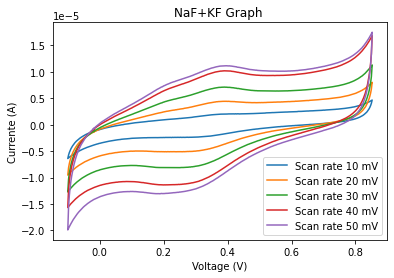

In [8]:
from matplotlib import pyplot as plt
plt.plot(V11[0],A11[0],'-',label='Scan rate 10 mV')
plt.plot(V22[0],A22[0],'-',label='Scan rate 20 mV')
plt.plot(V33[0],A33[0],'-',label='Scan rate 30 mV')
plt.plot(V44[0],A44[0],'-',label='Scan rate 40 mV')
plt.plot(V55[0],A55[0],'-',label='Scan rate 50 mV')

plt.legend()
plt.title('NaF+KF Graph ')
plt.ylabel('Currente (A)')
plt.xlabel('Voltage (V)')
plt.show()

In [9]:
import numpy as np
def findlocal(x,x0,u):#acha onde está x0 na lista x se ele ja foi visto no indice u
    for i in range(len(x)):
        if x[i]==x0 and i!=u:
            return i
    return u
def fin(x,x0):
    for i in range(len(x)):
        if x[i]==x0:
            return True
    return False
def newarea(x,y):
    area=0
    gone=[]
    #calcular área como retângulo que vai de um ponto até outro
    for i in range(len(x)-1):
        dx = x[i+1]-x[i]
        y1=y[findlocal(x,x[i+1],i+1)]
        y2 = y[findlocal(x,x[i],i)]
        avg_y1 = (y1-y[i+1])
        avg_y2 = (y2-y[i])
        avg_y = (abs(avg_y1)+abs(avg_y2))/2
        if fin(gone,x[i])==False:
            area+=abs(dx*avg_y)
            gone.append(x[i])
    return area
Ae1,Ae2,Ae3,Ae4,Ae5=[],[],[],[],[]

for i in range(1,len(V11)-1):
    Ae1.append(newarea(V11[i], A12[i]))
    Ae2.append(newarea(V22[i], A23[i]))
    Ae3.append(newarea(V33[i], A32[i]))
    Ae4.append(newarea(V44[i], A42[i]))
    Ae5.append(newarea(V55[i], A52[i]))
Ae = [np.mean(Ae1),np.mean(Ae2),np.mean(Ae3),np.mean(Ae4),np.mean(Ae5)]
eAe = np.array([np.std(Ae1),np.std(Ae2),np.std(Ae3),np.std(Ae4),np.std(Ae5)])/np.sqrt(len(Ae1))
print(Ae)

[2.696076855063439e-06, 5.53059553106626e-06, 8.836185733477273e-06, 1.256520102421443e-05, 1.4735715910792354e-05]


Fit Parameter: C_p = 62.0+-3.0 uF/g
0 = -5e-07+-4e-07


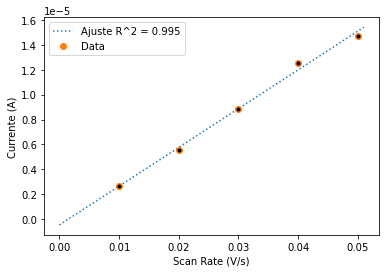

In [10]:
from scipy.optimize import curve_fit
k = np.array([10,20,30,40,50])
k = k*10**(-3)
def f(x,A,B):
    return A*x+B

popt, pcov = curve_fit(f, k,Ae)
std = np.sqrt(np.diag(pcov))
print(f'Fit Parameter: C_p = {round(popt[0]/MassG,0)}+-{round(std[0]/MassG,0)} uF/g')
print(f'0 = {round(popt[1],7)}+-{round(std[1],7)}')
ydata_mean = np.mean(Ae)
SST = np.sum((Ae - ydata_mean)**2)
ydata_fit = f(k, *popt)
SSR = np.sum((Ae - ydata_fit)**2)

x=np.linspace(0,51*10**(-3),50)
plt.plot(x,f(x,popt[0],popt[1]),':',label=f'Ajuste R^2 = {round(1-SSR/SST,3)}')
plt.plot(k,Ae,'o',label='Data')
plt.errorbar(k,Ae,yerr=eAe,fmt='.k')

plt.legend()
#plt.title('NaF+KF (Enumerated 2) ')
plt.xlabel('Scan Rate (V/s)')
plt.ylabel('Currente (A)')
plt.show()

# MXene LiF (Enumerated 3)

In [11]:
x = (5.1*2)/(600+400) #massa total do MXene por gota em mg.
#porcentage = Ti/Ti3C2
porcentage=0.3
#agora sabemos porcentagem, com ela achamos massa condutora
Mass = x*porcentage
print(f'{Mass} mg')
#passando para kg
MassG = Mass*10**(-3)#NA REAL É GRAMA

0.00306 mg


In [12]:
import pandas as pd
import numpy as np
data = pd.read_csv(f'10mV-Mxene3_2.txt',sep=';')
V1 = data['Potential applied (V)'].values
A1 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'20mV-Mxene3_2.txt',sep=';')
V2 = data['Potential applied (V)'].values
A2 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'30mV-Mxene3_2.txt',sep=';')
V3 = data['Potential applied (V)'].values
A3 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'40mV-Mxene3_2.txt',sep=';')
V4 = data['Potential applied (V)'].values
A4 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'50mV-Mxene3_2.txt',sep=';')
V5 = data['Potential applied (V)'].values
A5 = data['WE(1).Current (A)'].values

#pegando intervalo ótimo e já colocando dividido pela massa
ii = int(len(V1)/5)
ii = int(len(V1)/5)
V11 = []
A11=[]
V22 = []
A22=[]
V33 = []
A33=[]
V44 = []
A44=[]
V55 = []
A55=[]
for i in range(1,6):
    V11.append(V1[ii*i:ii*(i+1)-30])
    A11.append(A1[ii*i:ii*(i+1)-30])
    
    V22.append(V2[ii*i:ii*(i+1)-30])
    A22.append(A2[ii*i:ii*(i+1)-30])
    
    V33.append(V3[ii*i:ii*(i+1)-30])
    A33.append(A3[ii*i:ii*(i+1)-30])
    
    V44.append(V4[ii*i:ii*(i+1)-30])
    A44.append(A4[ii*i:ii*(i+1)-30])
    
    V55.append(V5[ii*i:ii*(i+1)-30])
    A55.append(A5[ii*i:ii*(i+1)-30])
A12,A23,A32,A42,A52=[],[],[],[],[]
for i in range(len(V55)):
    A12.append(A11[i]-min(A11[i]))
    A23.append(A22[i] - min(A22[i]))
    A32.append(A33[i]-min(A33[i]))
    A42.append(A44[i]-min(A44[i]))
    A52.append(A55[i]-min(A55[i]))

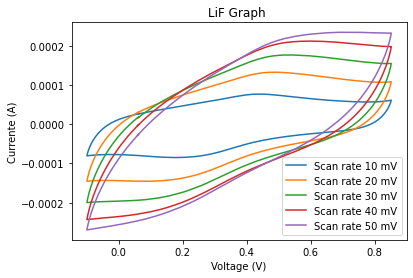

In [13]:
from matplotlib import pyplot as plt
j=1
plt.plot(V11[j],A11[j],'-',label='Scan rate 10 mV')
plt.plot(V22[j],A22[j],'-',label='Scan rate 20 mV')
plt.plot(V33[j],A33[j],'-',label='Scan rate 30 mV')
plt.plot(V44[j],A44[j],'-',label='Scan rate 40 mV')
plt.plot(V55[j],A55[j],'-',label='Scan rate 50 mV')

plt.legend()
plt.title('LiF Graph ')
plt.ylabel('Currente (A)')
plt.xlabel('Voltage (V)')
plt.show()

In [14]:
import numpy as np
def findlocal(x,x0,u):#acha onde está x0 na lista x se ele ja foi visto no indice u
    for i in range(len(x)):
        if x[i]==x0 and i!=u:
            return i
    return u
def fin(x,x0):
    for i in range(len(x)):
        if x[i]==x0:
            return True
    return False
def newarea(x,y):
    area=0
    gone=[]
    #calcular área como retângulo que vai de um ponto até outro
    for i in range(len(x)-1):
        dx = x[i+1]-x[i]
        y1=y[findlocal(x,x[i+1],i+1)]
        y2 = y[findlocal(x,x[i],i)]
        avg_y1 = (y1-y[i+1])
        avg_y2 = (y2-y[i])
        avg_y = (abs(avg_y1)+abs(avg_y2))/2
        if fin(gone,x[i])==False:
            area+=abs(dx*avg_y)
            gone.append(x[i])
    return area
Ae1,Ae2,Ae3,Ae4,Ae5=[],[],[],[],[]

for i in range(1,len(V11)-1):
    Ae1.append(newarea(V11[i], A12[i]))
    Ae2.append(newarea(V22[i], A23[i]))
    Ae3.append(newarea(V33[i], A32[i]))
    Ae4.append(newarea(V44[i], A42[i]))
    Ae5.append(newarea(V55[i], A52[i]))
Ae = [np.mean(Ae1),np.mean(Ae2),np.mean(Ae3),np.mean(Ae4),np.mean(Ae5)]
eAe = np.array([np.std(Ae1),np.std(Ae2),np.std(Ae3),np.std(Ae4),np.std(Ae5)])/np.sqrt(len(Ae1))
print(Ae)

[9.340868783493839e-05, 0.00015562950824694088, 0.0001962124340235805, 0.00022015076018865856, 0.000226220049212339]


Fit Parameter: C_p = 108.0+-21.0 F/g
0 = 7.93e-05+-2.09e-05


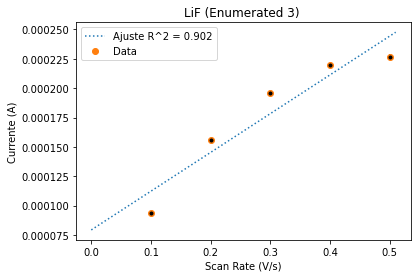

In [16]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
k = np.array([10,20,30,40,50])
k = k*10**(-2)
def f(x,A,B):
    return A*x+B

popt, pcov = curve_fit(f, k,Ae)
std = np.sqrt(np.diag(pcov))
print(f'Fit Parameter: C_p = {round(popt[0]/MassG,0)}+-{round(std[0]/MassG,0)} F/g')
print(f'0 = {round(popt[1],7)}+-{round(std[1],7)}')
ydata_mean = np.mean(Ae)
SST = np.sum((Ae - ydata_mean)**2)
ydata_fit = f(k, *popt)
SSR = np.sum((Ae - ydata_fit)**2)

x=np.linspace(0,51*10**(-2),50)
plt.plot(x,f(x,popt[0],popt[1]),':',label=f'Ajuste R^2 = {round(1-SSR/SST,3)}')
plt.plot(k,Ae,'o',label='Data')
plt.errorbar(k,Ae,yerr=eAe,fmt='.k')

plt.legend()
plt.title('LiF (Enumerated 3) ')
plt.xlabel('Scan Rate (V/s)')
plt.ylabel('Currente (A)')
plt.show()